# Packages

### install packges

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install sklearn
# !pip install seaborn
# !pip install nltk
# !pip install matplotlib
# !pip install mahad
# !pip install tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### import packges

In [2]:
import os
import re
from collections import Counter
import json

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
from nltk.stem import WordNetLemmatizer
from maha.cleaners.functions import remove,normalize,reduce_repeated_substring
from maha.expressions.general import EXPRESSION_EMOJIS
from matplotlib import pyplot as plt

from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.trainers import WordLevelTrainer

%matplotlib inline

In [3]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

# Datasets

### datasets uploading

In [4]:
# create data folder, assign data path urls and data expected columns
data_folder = 'sample_data'
data_folder = os.path.join(os.curdir,data_folder)
test_neg_data = f'{data_folder}/test_Arabic_tweets_negative_20190413.tsv'
test_pos_data = f'{data_folder}/test_Arabic_tweets_positive_20190413.tsv'
train_neg_data = f'{data_folder}/train_Arabic_tweets_negative_20190413.tsv'
train_pos_data = f'{data_folder}/train_Arabic_tweets_positive_20190413.tsv'
columns = ["sentiment","tweet"]

In [5]:
# read data from files
test_arabic_neg_tweets = pd.read_csv(
    filepath_or_buffer=test_neg_data, sep='\t', names=columns, header=None
)
test_arabic_pos_tweets = pd.read_csv(
    filepath_or_buffer=test_pos_data, sep='\t', names=columns, header=None
)
train_arabic_neg_tweets = pd.read_csv(
    filepath_or_buffer=train_neg_data, sep='\t', names=columns, header=None
)
train_arabic_pos_tweets = pd.read_csv(
    filepath_or_buffer=train_pos_data, sep='\t', names=columns, header=None
)

In [6]:
test_arabic_neg_tweets.head()

,sentiment,tweet
0,neg,حتى الايتونز خربتوه مو صاحين انتو؟؟ 😭
1,neg,واحد تبع النظام السوري يقول أن المخابرات السور...
2,neg,الى متى التعامل السئ للخادمات وعدم احترامهم وك...
3,neg,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي
4,neg,تتمغط ومعها سداع 😫


In [7]:
test_arabic_pos_tweets.head()

,sentiment,tweet
0,pos,#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران...
1,pos,صباحك خيرات ومسرات 🌸
2,pos,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
3,pos,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...
4,pos,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...


In [8]:
train_arabic_neg_tweets.head()

,sentiment,tweet
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4,neg,الدودو جايه تكمل علي 💔


In [9]:
train_arabic_pos_tweets.head()

,sentiment,tweet
0,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,pos,من الخير نفسه 💛
3,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...


### creating testing and training datasets by concatination 

In [10]:
# put negative and positive tweets together for each type (test or train)
test_raw = pd.concat([test_arabic_neg_tweets,test_arabic_pos_tweets])
test_raw.reset_index(inplace=True)
train_raw = pd.concat([train_arabic_neg_tweets,train_arabic_pos_tweets])
train_raw.reset_index(inplace=True)
# make a copy
test_data = test_raw.copy(deep=True)
test_data.drop(columns=['index'], axis=1, inplace=True)
train_data = train_raw.copy(deep=True)
train_data.drop(columns=['index'], axis=1, inplace=True)

# Viualization

### original dataset lengths

In [11]:
original_test_dataset_length = len(test_data['tweet'])
original_train_dataset_length = len(train_data['tweet'])
original_total_dataset_length = original_test_dataset_length + original_train_dataset_length
print(original_test_dataset_length,original_train_dataset_length,original_total_dataset_length)

11520 45275 56795


### remove duplicates

In [12]:
print("test data with duplicates if exists",len(test_data['tweet']))

test data with duplicates if exists 11520


In [13]:
test_data[~test_data['tweet'].duplicated()]
print("test data without duplicates",len(test_data['tweet']))

test data without duplicates 11520


In [14]:
print("train data with duplicates if exists",len(train_data['tweet']))

train data with duplicates if exists 45275


In [15]:
train_data[~train_data['tweet'].duplicated()]
print("train data without duplicates",len(train_data['tweet']))

train data without duplicates 45275


### remove doubtable from test tweets (tweet length > 280 character)

In [16]:
# remove tweets that are bigger than tweet charachter limitation
## for test data
doubtable_test_tweets = [(index,tweet) for index,tweet in enumerate(test_data["tweet"]) if len(tweet) > 280]
remove_index = [tweet_tuple[0] for tweet_tuple in doubtable_test_tweets]
print("number of removed tweets in test data",len(doubtable_test_tweets))
print("removed indeces",remove_index)
print(f"example (for test data): tweet for index ({remove_index[0]}) is -",len(test_data['tweet'].iloc[remove_index[0]]),"- char")
selected_test_data = test_data.drop(index=remove_index)
selected_test_data.reset_index(inplace=True)
selected_test_data.drop(columns=['index'], axis=1, inplace=True)
## for train data
doubtable_train_tweets = [(index,tweet) for index,tweet in enumerate(train_data["tweet"]) if len(tweet) > 280]
remove_index = [tweet_tuple[0] for tweet_tuple in doubtable_train_tweets]
print("number of removed tweets in train data",len(doubtable_train_tweets))
print("removed indeces",remove_index)
print(f"example (for train data): tweet for index ({remove_index[0]}) is -",len(train_data['tweet'].iloc[remove_index[0]]),"- char")
selected_train_data = train_data.drop(index=remove_index)
selected_train_data.reset_index(inplace=True)
selected_train_data.drop(columns=['index'], axis=1, inplace=True)

number of removed tweets in test data 12
removed indeces [227, 740, 6019, 6165, 6461, 7876, 8374, 8715, 8840, 10020, 11001, 11143]
example (for test data): tweet for index (227) is - 393 - char
number of removed tweets in train data 57
removed indeces [936, 1086, 1639, 2177, 3273, 3490, 5140, 5403, 5915, 7737, 9255, 9568, 9800, 14039, 15326, 15745, 23118, 24886, 26902, 27472, 29192, 29255, 29538, 30197, 30429, 30771, 30916, 30978, 31127, 32783, 32945, 33521, 34407, 34504, 34609, 34987, 35305, 35547, 36529, 36638, 37371, 37959, 38283, 38391, 38505, 38515, 38960, 39380, 41972, 42506, 42611, 43380, 43451, 44120, 44206, 44739, 45018]
example (for train data): tweet for index (936) is - 3993 - char


### used tweets datsets visualization

In [17]:
print("test data, words level stat")
selected_test_data['tweet'].apply(lambda x: len(x.split(' '))).describe()

test data, words level stat


count    11508.000000
mean        12.943691
std          7.016384
min          3.000000
25%          6.000000
50%         13.000000
75%         19.000000
max         44.000000
Name: tweet, dtype: float64

In [18]:
print("test data, characters level stat")
selected_test_data['tweet'].apply(lambda x: len(x)).describe()

test data, characters level stat


count    11508.000000
mean        64.776243
std         36.685628
min          6.000000
25%         30.000000
50%         62.000000
75%        102.000000
max        140.000000
Name: tweet, dtype: float64

test data pos vs. neg


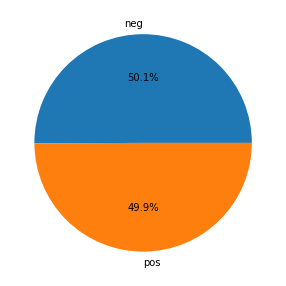

In [19]:
# positive = len(selected_test_data[selected_test_data['sentiment'] == 'pos'])
# negative = len(selected_test_data[selected_test_data['sentiment'] == 'neg'])
# df = pd.DataFrame({'values':[positive,negative]},index=['positive','negative'])
# print(positive,negative)
# df.plot.pie(y='values', figsize=(5,5))
print("test data pos vs. neg")
test_data_sentiment_count = test_data.groupby(by='sentiment',as_index=False).count()[["sentiment","tweet"]]
fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(x=test_data_sentiment_count["tweet"].to_list(), 
       labels=test_data_sentiment_count["sentiment"].to_list(),
       autopct='%1.1f%%'
      )

fig.show()

In [20]:
print("train data, words level stat")
selected_train_data['tweet'].apply(lambda x: len(x.split(' '))).describe()

train data, words level stat


count    45218.000000
mean        12.972754
std          6.991245
min          3.000000
25%          6.000000
50%         13.000000
75%         19.000000
max         54.000000
Name: tweet, dtype: float64

In [21]:
print("train data, characters level stat")
selected_train_data['tweet'].apply(lambda x: len(x)).describe()

train data, characters level stat


count    45218.000000
mean        64.891702
std         36.587360
min          5.000000
25%         30.000000
50%         63.000000
75%        102.000000
max        280.000000
Name: tweet, dtype: float64

train data pos vs. neg


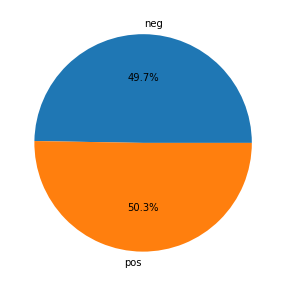

In [22]:
# positive = len(selected_train_data[selected_train_data['sentiment'] == 'pos'])
# negative = len(selected_train_data[selected_train_data['sentiment'] == 'neg'])
# df = pd.DataFrame({'values':[positive,negative]},index=['positive','negative'])
# print(positive,negative)
# df.plot.pie(y='values', figsize=(5,5))
print("train data pos vs. neg")
train_data_sentiment_count = train_data.groupby(by='sentiment',as_index=False).count()[["sentiment","tweet"]]
fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(x=train_data_sentiment_count["tweet"].to_list(), 
       labels=train_data_sentiment_count["sentiment"].to_list(),
       autopct='%1.1f%%'
      )

fig.show()

# Text Preprocessing

### text cleaning

##### remove stop words

In [23]:
stop_words = stopwords.words("arabic")
def remove_stop_words(text:str) -> str:
  return " ".join([word for word in text.split(' ') if word not in stop_words])

##### remove:
- hashtags
- mentions
- links
- english character
- numbers
- diacritics


In [24]:
def remove_all(text:str) -> str:
  text = remove(text=text, hashtags=True)
  text = remove(text=text, mentions=True)
  text = remove(text=text, links=True)
  text = remove(text=text, emails=True)
  text = remove(text=text, english=True)
  text = remove(text=text, numbers=True)
  text = remove(text=text, all_harakat=True)
  text = remove(text=text, tatweel=True)
  text = remove(text=text, arabic_ligatures=True)
  return text

##### remove punctuations

In [25]:
punctuations = re.compile(r"""[!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]""")
def remove_punctuations(text: str) -> str:
    return punctuations.sub(repl="", string=text)

##### remove digits

In [26]:
digits = re.compile("\.{2,}")
def remove_digits(text: str) -> str:
    return digits.sub(repl="", string=text)

##### remove multiple whitespace

In [27]:
multiple_space_re = re.compile("\s{2,}")
def remove_multiple_whitespace(text: str) -> str:
    return multiple_space_re.sub(repl=" ", string=text)

##### remove duplicate character

In [28]:
def remove_duplictae_char(text:str) -> str:
    return reduce_repeated_substring(text=text, min_repeated=3, reduce_to=1)

##### add spaces around emojis

In [29]:
emojis_regex = re.compile(EXPRESSION_EMOJIS.pattern)
def space_around_emojis(text: str) -> str:
    chars = [' ' + char + ' ' if emojis_regex.match(char) else char for char in text]
    return ''.join(chars)

##### clean all function

In [30]:
def clean_all(text:str) -> str:
  text = remove_stop_words(text=text)
  # To remove trailing and leading whitespaces
  text = text.strip()
  text = remove_all(text=text)
  text = space_around_emojis(text=text)
  text = remove_duplictae_char(text=text)
  text = normalize(text=text, all=True)
  text = remove_punctuations(text=text)
  text = remove_digits(text=text)
  text = remove_multiple_whitespace(text=text)
  return text

# rwo ways to run function with apply
# first way
selected_test_data["cleaned tweet"] = selected_test_data["tweet"].apply(lambda x: clean_all(x))
# second way
selected_train_data["cleaned tweet"] = selected_train_data["tweet"].apply(clean_all)


### cleaned text visualization

##### tweets max length and used max length

In [31]:
all_tweets = pd.concat([selected_train_data,selected_test_data])
all_tweets.reset_index(inplace=True)
cleaned_tweets_length = all_tweets["cleaned tweet"].apply(lambda x: len(x.split(' '))).to_list()
max_length = int(np.percentile(a=cleaned_tweets_length, q=100))
uesd_max_length = int(np.percentile(a=cleaned_tweets_length, q=99))
print("max length",max_length)
print("used max length",uesd_max_length)

max length 101
used max length 26


all tweets lengths


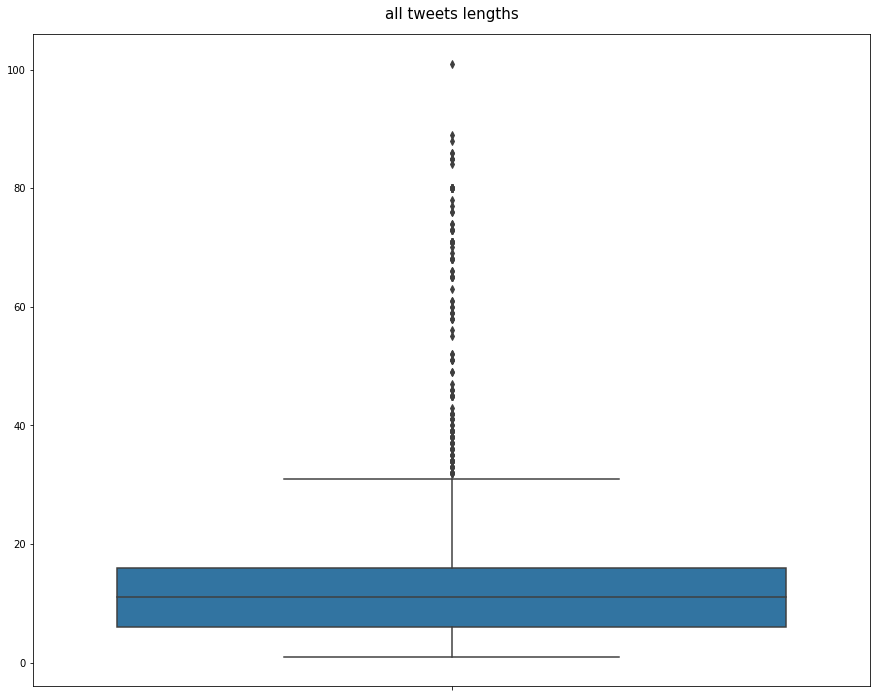

In [32]:
print("all tweets lengths")
counts = cleaned_tweets_length
fig, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(y=counts, ax=ax)
ax.set_title("all tweets lengths", fontdict=dict(size=15), pad=15)
plt.show()

##### remove tweets with length bigger than used max length

In [33]:

# remove tweets that are bigger than used max length
## for test data
doubtable_test_tweets = [(index,tweet) for index,tweet in enumerate(selected_test_data["cleaned tweet"]) if len(tweet.split(" ")) > uesd_max_length]
remove_index = [tweet_tuple[0] for tweet_tuple in doubtable_test_tweets]
print("number of removed tweets in test data",len(doubtable_test_tweets))
print("removed indeces",remove_index)
print(f"example (for test data): tweet for index {remove_index[0]} is -",len(selected_test_data["cleaned tweet"].iloc[remove_index[0]].split(" ")),"- word")
print("tweet is:",selected_test_data["cleaned tweet"].iloc[remove_index[0]])
selected_test_data.drop(index=remove_index, inplace=True)
selected_test_data.reset_index(inplace=True)
selected_test_data.drop(columns=['index'], axis=1, inplace=True)
## for train data
doubtable_train_tweets = [(index,tweet) for index,tweet in enumerate(selected_train_data["cleaned tweet"]) if len(tweet.split(" ")) > uesd_max_length]
remove_index = [tweet_tuple[0] for tweet_tuple in doubtable_train_tweets]
print("number of removed tweets in train data",len(doubtable_train_tweets))
print("removed indeces",remove_index)
print(f"example (for train data): tweet for index {remove_index[0]} is -",len(selected_train_data["cleaned tweet"].iloc[remove_index[0]].split(" ")),"- word")
print("tweet is:",selected_train_data["cleaned tweet"].iloc[remove_index[0]])
selected_train_data.drop(index=remove_index, inplace=True)
selected_train_data.reset_index(inplace=True)
selected_train_data.drop(columns=['index'], axis=1, inplace=True)

number of removed tweets in test data 82
removed indeces [306, 348, 796, 1225, 1340, 1411, 1467, 1644, 2124, 2343, 2465, 2655, 3621, 3910, 4107, 4180, 4260, 4321, 4397, 4449, 4507, 4807, 4974, 4987, 5188, 5367, 5409, 5466, 5493, 5732, 5760, 5818, 5870, 6230, 6432, 6842, 6861, 6871, 7079, 7093, 7115, 7250, 7277, 7359, 7445, 7522, 7734, 7771, 8052, 8102, 8230, 8262, 8318, 8440, 8512, 8551, 8722, 8747, 8856, 9169, 9345, 9374, 9444, 9589, 9646, 9722, 9799, 9833, 9857, 9988, 10014, 10092, 10095, 10109, 10404, 10576, 10898, 11044, 11120, 11261, 11345, 11430]
example (for test data): tweet for index 306 is - 29 - word
tweet is: دكتور شيل القلب ماعاد مطلوب 💔 خلني اعيش الوقت كله بلا قلب 💔 ان شفت فيني عوق توصف حبوب 💔 خلني اموت وقول ماينفع الطب 💔 ✍ ️ 
number of removed tweets in train data 357
removed indeces [193, 209, 219, 627, 857, 861, 1143, 1245, 1271, 1390, 1472, 1662, 1692, 1710, 1742, 1850, 1901, 2016, 2022, 2103, 2148, 2380, 2394, 2457, 2568, 2901, 3486, 3767, 3773, 3844, 4009, 4039, 409

all tweets lengths after removing tweets lengths > used max length


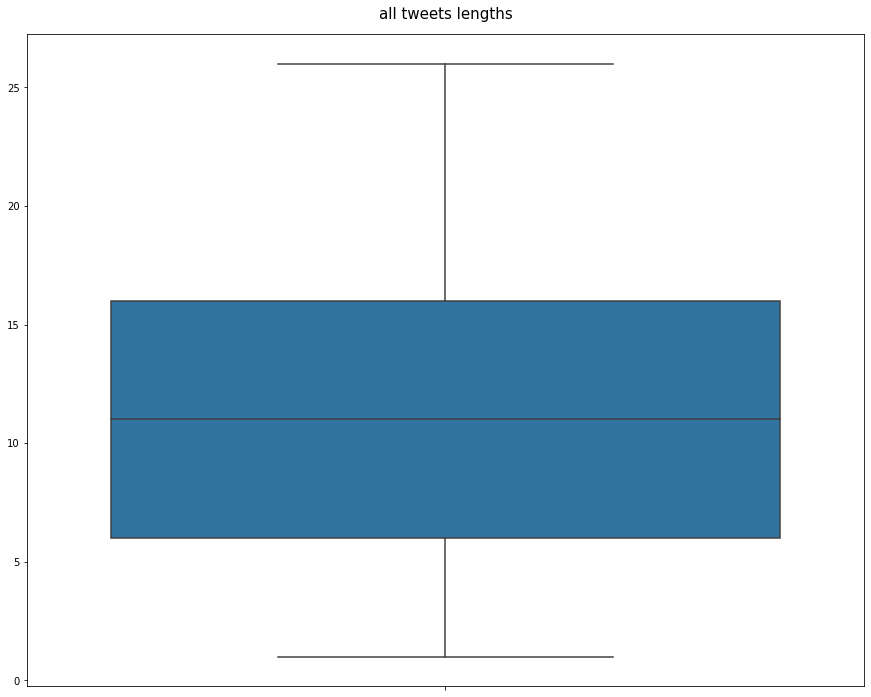

In [34]:
all_tweets = pd.concat([selected_train_data,selected_test_data])
all_tweets.reset_index(inplace=True)
cleaned_tweets_length = all_tweets["cleaned tweet"].apply(lambda x: len(x.split(' '))).to_list()
print("all tweets lengths after removing tweets lengths > used max length")
counts = cleaned_tweets_length
fig, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(y=counts, ax=ax)
ax.set_title("all tweets lengths", fontdict=dict(size=15), pad=15)
plt.show()

##### used tweets dataset lengths (compare with original tweets dataset)

In [35]:
used_test_dataset_length = len(selected_test_data['cleaned tweet'])
used_train_dataset_length = len(selected_train_data['cleaned tweet'])
used_total_dataset_length = used_test_dataset_length + used_train_dataset_length
print("test dataset (no. of tweets)")
print("original",original_test_dataset_length)
print("used",used_test_dataset_length)
print("train dataset (no. of tweets)")
print("original",original_train_dataset_length)
print("used",used_train_dataset_length)
print("total dataset (no. of tweets)")
print("original",original_total_dataset_length)
print("used",used_total_dataset_length)
# plt.hist(
#     x=[
#         original_test_dataset_length,
#         used_test_dataset_length,
#         original_train_dataset_length,
#         used_train_dataset_length,
#         original_total_dataset_length,
#         used_total_dataset_length
#     ]
# )

test dataset (no. of tweets)
original 11520
used 11426
train dataset (no. of tweets)
original 45275
used 44861
total dataset (no. of tweets)
original 56795
used 56287


### stemming and lemmatization

##### stemming and lemmatization

In [36]:
stemmer = ISRIStemmer()
lemmatizer = WordNetLemmatizer()
for index in range(2):
  stemmed_data = []
  if index == 0:
    cleaned_data = selected_test_data["cleaned tweet"]
  else:
    cleaned_data = selected_train_data["cleaned tweet"]
  for tweet in cleaned_data:
    stemmed_words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in tweet.split(" ")]
    stemmed_words = " ".join(stemmed_words)
    stemmed_data.append(stemmed_words)
  if index == 0:
    selected_test_data["stemmed tweet"] = stemmed_data
  else:
    selected_train_data["stemmed tweet"] = stemmed_data

In [37]:
unstemmed_words = [word for tweet in selected_test_data["tweet"] for word in tweet.split(" ")] + [word for tweet in selected_train_data["tweet"] for word in tweet.split(" ")]
def get_stem_words()->list:
  return [word for tweet in selected_test_data["stemmed tweet"] for word in tweet.split(" ")] + [word for tweet in selected_train_data["stemmed tweet"] for word in tweet.split(" ")]
stemmed_words = get_stem_words()
unstemmed_vocab = Counter(unstemmed_words)
stemmed_vocab = Counter(stemmed_words)
print("unstemmed vocab counter",len(unstemmed_vocab))
print("stemmed vocab counter",len(stemmed_vocab))

unstemmed vocab counter 91429
stemmed vocab counter 19555


stemmed word count


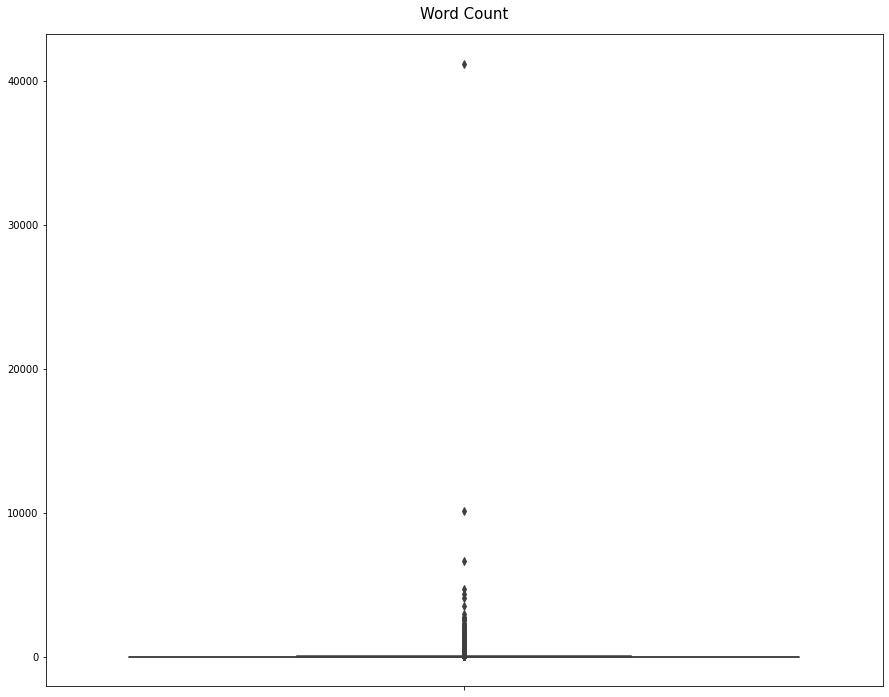

In [38]:
print("stemmed word count")
counts = list(stemmed_vocab.values())
fig, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(y=counts, ax=ax)
ax.set_title("Word Count", fontdict=dict(size=15), pad=15)
plt.show()

In [39]:
print("stemmed vocab")
stemmed_vocab.most_common(n=10)

stemmed vocab


[('', 41183),
 ('الل', 10126),
 ('💔', 6660),
 ('😂', 4681),
 ('،', 4369),
 ('💙', 4043),
 ('قلب', 3544),
 ('لهم', 2967),
 ('😭', 2752),
 ('خير', 2673)]

##### remove un-needed most common after stemming and lemmatization

In [40]:
def subsitute(tweet:str,to_remove_words:list) -> str:
  sentence = tweet.split(" ")
  text_list = []
  for index,word in enumerate(sentence):
    if word not in to_remove_words:
      text_list.append(word)
  text = " ".join(text_list)
  return text
to_remove_words = ['الل',''," "]
selected_test_data["stemmed tweet"] = selected_test_data["stemmed tweet"].apply(lambda x:subsitute(tweet=x,to_remove_words=to_remove_words))
selected_train_data["stemmed tweet"] = selected_train_data["stemmed tweet"].apply(lambda x:subsitute(tweet=x,to_remove_words=to_remove_words))

In [41]:
stemmed_words = get_stem_words()
stemmed_vocab = Counter(stemmed_words)
print("stemmed vocab after removing most common")
stemmed_vocab.most_common(n=10)

stemmed vocab after removing most common


[('💔', 6660),
 ('😂', 4681),
 ('،', 4369),
 ('💙', 4043),
 ('قلب', 3544),
 ('لهم', 2967),
 ('😭', 2752),
 ('خير', 2673),
 ('صبح', 2580),
 ('علم', 2545)]

In [42]:
stemmed_vocab.most_common()[-15:-1]

[('🦐', 1),
 ('حدث،', 1),
 ('مبتردش', 1),
 ('عك؟؟', 1),
 ('‗−¯«', 1),
 ('※', 1),
 ('مفقودا،', 1),
 ('خلافيا…', 1),
 ('غيا', 1),
 ('،لكل', 1),
 ('🌛', 1),
 ('قربهم،', 1),
 ('خنس', 1),
 ('ظن…', 1)]

# Tokenization

### create tokenizer

In [43]:
min_word_freq=3
all_stemmed = pd.concat([selected_train_data,selected_test_data])
all_stemmed.reset_index(inplace=True)
all_stemmed.drop(columns='index', axis=1, inplace=True)
tokenizer = Tokenizer(model=WordLevel(unk_token="[OOV]"))
tokenizer.enable_padding(direction='left', pad_id=0, pad_token="[PAD]")
trainer = WordLevelTrainer(
    vocab_size=200000, 
    show_progress=True, 
    min_frequency=min_word_freq, 
    special_tokens=["[PAD]", "[OOV]"]
)
tokenizer.train_from_iterator(iterator=map(lambda x: x.split(" "), all_stemmed["stemmed tweet"].tolist()),trainer=trainer)
tokenizer.get_vocab_size()

9285

In [44]:
all_stemmed["stemmed tweet"].tolist()

['عرف ان بتس كنو شوي شوي جيبو رسي اليوم زيد 😭',
 'وقع اذا جات دار بشف كمل حين احس احد نقص 💔',
 'كتب وقع نتج لقء هلل اهل تاق 👇 دخل سحب قيم ايف عل…',
 'نعم ضاد حيي تضع قطر 💧 ضاد نسل كتر 🦠 فجر 💥 تمت اخر بدو انه كتر قام خذ…',
 'دودو جيه كمل علي 💔',
 'حبب قنع فات عمر نظر 🙈',
 'بدو ان دجل عاد تهم جسد بني يكر عبر 👆 👆 💔 سمع ان بشر عطش شرب ماء لم…',
 'جلس ذكر 😣',
 'يكف خفف عقل عرب امن خبر مان قدر وقف اي عصب جرم 🤔 وا…',
 'يلل ترا كلج كثر مشي 😭',
 'بيد رجع سعت وين رجع؟ الا صدفه؟ ولل ابق افر بيه رجع بشر اعرف ونه علق عرق دمع…',
 'ليه محد يسي معي 💔',
 'انت يمكن الي نسي حدث بصر شهر او غافل عنه قتل ظاهر بدم برد منو قتل 😕',
 'يعن 😔',
 'فرج دءا امس قرب كلهم قرب فنز الا بوب بعد يسر دري ليه 💔',
 '⚛ تبي شي يقي جنس 😳 ☣ ريفر عطك 😉 🔸 جمع عزز قدر 👨 مع 🌹 ارج بلس الت اكا 🌹 ✅ مني هتقوي…',
 'مش وقت خلص تعب ده 😭',
 'عرف انه فلس تغر نفس تغر ونت فلس هيد قله ادب 😒',
 'ربن رزقگ ببن حلل 💔',
 'جمل حل وقع 🥀',
 'قبل منك 💔',
 'سفر امر كشف خبي 😑',
 'سلم 😓',
 '⛔ 🍯 قسم بلل انه عسل 🍯 ⛔ سدر طبع ♨ ️ ⚠ ️ مضمون…',
 'شكر انو قلب عضل

tokenizer vocab count for all stemmed tweets
[PAD] 0
[OOV] 1


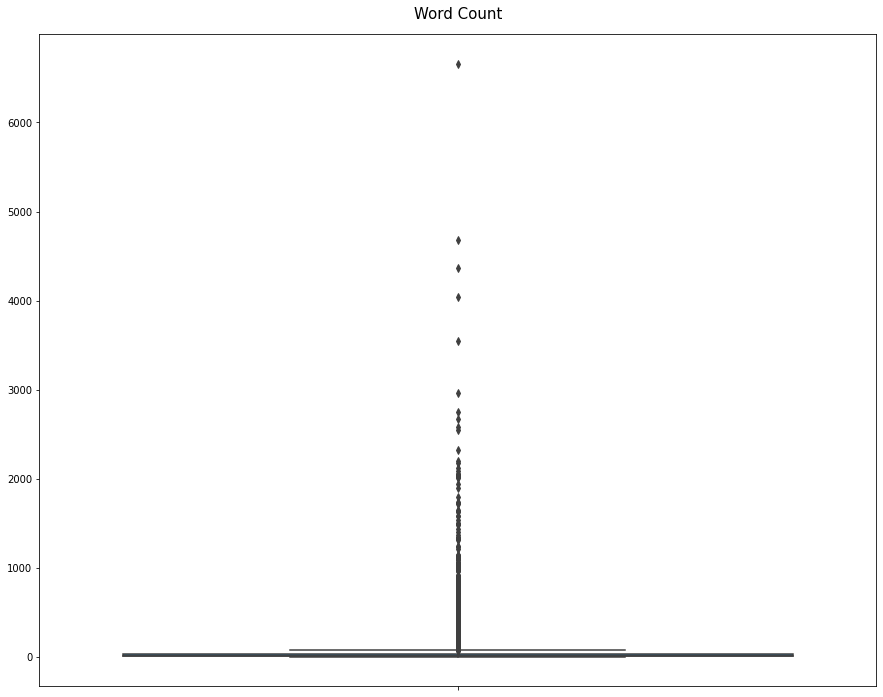

9283


In [45]:
print("tokenizer vocab count for all stemmed tweets")
counts = [stemmed_vocab.get(key) for key in tokenizer.get_vocab().keys() if key != '[PAD]' and key != '[OOV]' ]
for key,value in tokenizer.get_vocab().items():
  count = stemmed_vocab.get(key)
  if count == None:
    print(key,value)
fig, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(y=counts, ax=ax)
ax.set_title("Word Count", fontdict=dict(size=15), pad=15)
plt.show()
print(len(counts))

### prepare stemmed tweets, vocabs dicts and tokenization to be saved

##### prepare stemmed tweets

In [46]:
stemmed_tweets_data = dict({
    'train_input':selected_train_data["stemmed tweet"].to_list(),
    'train_output':selected_train_data["sentiment"].to_list(),
    'test_input':selected_test_data["stemmed tweet"].to_list(),
    'test_output':selected_test_data["sentiment"].to_list()
})

##### prepare vocabs dicts

In [47]:
vocab_to_index = tokenizer.get_vocab()
index_to_vocab = {value:key for (key,value) in vocab_to_index.items()}
print(vocab_to_index.get(''))
print(index_to_vocab.get(13))

None
ولل


In [48]:
vocabs = dict({
    'vocab_to_index':vocab_to_index,
    'index_to_vocab':index_to_vocab
})

##### prepare tokenization

In [49]:
# train tweets dataset tokenization
train_data_tweets = selected_train_data["stemmed tweet"].apply(lambda x: x.split(" ")).to_list()
train_data_tokenization_matrix = tokenizer.encode_batch(input=train_data_tweets,is_pretokenized=True)
train_data_tokenization_matrix = list(map(lambda x:x.ids, train_data_tokenization_matrix))

# test tweets dataset tokenization
test_data_tweets = selected_test_data["stemmed tweet"].apply(lambda x: x.split(" ")).to_list()
test_data_tokenization_matrix = tokenizer.encode_batch(input=test_data_tweets,is_pretokenized=True)
test_data_tokenization_matrix = list(map(lambda x:x.ids, test_data_tokenization_matrix))

# all tweets dataset tokenization
all_stemmed_tweets = all_stemmed["stemmed tweet"].apply(lambda x: x.split(" ")).to_list()
tokenization_matrix = tokenizer.encode_batch(input=all_stemmed_tweets,is_pretokenized=True)
tokenization_matrix = list(map(lambda x:x.ids, tokenization_matrix))

In [50]:
def manual_tokenization(tweet:str):
  tokens = [vocab_to_index.get(word) if vocab_to_index.get(word) != None else 1 for word in tweet.split(" ")]
  tokens_length = len(tokens)
  manual_tokenized_tweet = [0]*uesd_max_length
  for index in range(uesd_max_length):
    if(tokens_length - index - 1 >= 0):
      manual_tokenized_tweet[(uesd_max_length - index - 1)] = tokens[tokens_length - index - 1]
    else:
      manual_tokenized_tweet[(uesd_max_length - index - 1)] = 0
  print("tokenized tweet manually is",manual_tokenized_tweet)

In [51]:
index = 5
# train tweets dataset tokenization
print("train tokenization length",len(train_data_tokenization_matrix))
print("tokenization length for train single tweet",len(train_data_tokenization_matrix[index]))
tweet = selected_train_data["stemmed tweet"].iloc[index]
print("train tweet is",tweet)
manual_tokenization(tweet)
print("tokenized tweet by tokenizer is",train_data_tokenization_matrix[index])

# test tweets dataset tokenization
print("test tokenization length",len(test_data_tokenization_matrix))
print("tokenization length for test single tweet",len(test_data_tokenization_matrix[index]))
tweet = selected_test_data["stemmed tweet"].iloc[index]
print("test tweet is",tweet)
manual_tokenization(tweet)
print("tokenized tweet by tokenizer is",test_data_tokenization_matrix[index])

# all tweets dataset tokenization
print("all tokenization length",len(tokenization_matrix))
print("tokenization length for a single tweet in all tweets",len(tokenization_matrix[index]))
tweet = all_stemmed["stemmed tweet"].iloc[index]
print("tweet is",tweet)
manual_tokenization(tweet)
print("tokenized tweet by tokenizer is",tokenization_matrix[index])

train tokenization length 44861
tokenization length for train single tweet 26
train tweet is حبب قنع فات عمر نظر 🙈
tokenized tweet manually is [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 105, 857, 1469, 79, 64, 156]
tokenized tweet by tokenizer is [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 105, 857, 1469, 79, 64, 156]
test tokenization length 11426
tokenization length for test single tweet 26
test tweet is اذا لطف كوبل مر علي 😭 😭 💛 💛 حظ جني سمء ليح 😔 وحظ اثي ليح وقي جني
tokenized tweet manually is [0, 0, 0, 0, 0, 0, 0, 148, 453, 1, 1459, 17, 8, 8, 35, 35, 1467, 1677, 561, 4126, 29, 4155, 1, 4126, 2501, 1677]
tokenized tweet by tokenizer is [0, 0, 0, 0, 0, 0, 0, 148, 453, 1, 1459, 17, 8, 8, 35, 35, 1467, 1677, 561, 4126, 29, 4155, 1, 4126, 2501, 1677]
all tokenization length 56287
tokenization length for a single tweet in all tweets 26
tweet is حبب قنع فات عمر نظر 🙈
tokenized tweet manually is [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [52]:
tokenization_list = dict({
    'tokenization_matrix':tokenization_matrix,
    'test_data_tokenization_matrix':test_data_tokenization_matrix,
    'train_data_tokenization_matrix':train_data_tokenization_matrix
})

### save tokenization matrix, vocabs and stemmed tweets

In [53]:
stemmed_tweets_path = os.path.join(data_folder,'stemmed_tweets.json')
vocab_path = os.path.join(data_folder,'vocabs.json')
tokenization_path = os.path.join(data_folder,'tokenization_matrix.json')

with open(stemmed_tweets_path, "wt+") as f:
    json.dump(obj=stemmed_tweets_data, fp=f, ensure_ascii=False)
  
with open(vocab_path, "wt+") as f:
    json.dump(obj=vocabs, fp=f, ensure_ascii=False)

with open(tokenization_path, "wt+") as f:
    json.dump(obj=tokenization_list, fp=f)